# Topic Analysis of Review Data

In [148]:
import pandas as pd

In [149]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [150]:
file_path = r'C:\Users\CS\Documents\Caltech AIML\NLP_Analysis_Data_Project\K8 Reviews v0.2.csv'
df = pd.read_csv(file_path)

In [151]:
print(df.head())

   sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...


In [152]:
df.shape

(14675, 2)

In [153]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

 ## 2. Normalize casings for the review text and extract the text into a list for easier manipulation.

In [154]:
df['cleaned_review'] = df['review'].apply(lambda x: str(x).lower())
df.head()

,sentiment,review,cleaned_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


## 3.Tokenize the reviews using NLTKs word_tokenize function

In [155]:
df['cleaned_review'] = df['cleaned_review'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True).str.replace(r'\s{2,}', ' ', regex=True)
df.head()


,sentiment,review,cleaned_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [156]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,review,cleaned_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


## 4.Perform parts-of-speech tagging on each sentence using the NLTK POS tagger

In [157]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [158]:
df['pos_tagged_review'] = df['cleaned_review'].apply(lambda x: pos_tag(x))

# Display the DataFrame to see the results
df.head()

,sentiment,review,cleaned_review,pos_tagged_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]","[(good, JJ), (but, CC), (need, VBP), (updates,..."
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery...","[(worst, JJS), (mobile, NN), (i, NN), (have, V..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre...","[(when, WRB), (i, NN), (will, MD), (get, VB), ..."
3,1,Good,[good],"[(good, JJ)]"
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t...","[(the, DT), (worst, JJS), (phone, NN), (everth..."


In [159]:
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
# Extract only the nouns from the POS-tagged reviews
df['nouns_only_review'] = df['pos_tagged_review'].apply(
    lambda sentence: [token for token, tag in sentence if tag in noun_tags]
)

# Display the DataFrame to see the results
df.head()

,sentiment,review,cleaned_review,pos_tagged_review,nouns_only_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]","[(good, JJ), (but, CC), (need, VBP), (updates,...","[updates, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery...","[(worst, JJS), (mobile, NN), (i, NN), (have, V...","[mobile, i, battery, hell, backup, hours, inte..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre...","[(when, WRB), (i, NN), (will, MD), (get, VB), ...","[i, cash]"
3,1,Good,[good],"[(good, JJ)]",[]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t...","[(the, DT), (worst, JJS), (phone, NN), (everth...","[phone, everthey, phone, problem, amazon, phon..."


## 6. Lemmatization

In [160]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [161]:
df['lemmatized_review'] = df['nouns_only_review'].apply(
    lambda nouns: [lemmatizer.lemmatize(word) for word in nouns]
)

# Display the DataFrame to see the results
df.head()

,sentiment,review,cleaned_review,pos_tagged_review,nouns_only_review,lemmatized_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]","[(good, JJ), (but, CC), (need, VBP), (updates,...","[updates, improvements]","[update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery...","[(worst, JJS), (mobile, NN), (i, NN), (have, V...","[mobile, i, battery, hell, backup, hours, inte...","[mobile, i, battery, hell, backup, hour, inter..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre...","[(when, WRB), (i, NN), (will, MD), (get, VB), ...","[i, cash]","[i, cash]"
3,1,Good,[good],"[(good, JJ)]",[],[]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t...","[(the, DT), (worst, JJS), (phone, NN), (everth...","[phone, everthey, phone, problem, amazon, phon...","[phone, everthey, phone, problem, amazon, phon..."


## 7. Remove stopwords and punctuation

In [162]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


# Function to remove stopwords and punctuation
def remove_stopwords_and_punctuation(words_list):
    return [word for word in words_list if word not in stop_words and word not in punctuation]

# Apply the function to the lemmatized reviews
df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords_and_punctuation)

# Display the DataFrame to see the results
df.head()



df.head()

,sentiment,review,cleaned_review,pos_tagged_review,nouns_only_review,lemmatized_review
0,1,Good but need updates and improvements,"[good, need, updates, improvements]","[(good, JJ), (but, CC), (need, VBP), (updates,...","[updates, improvements]","[update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin...","[(worst, JJS), (mobile, NN), (i, NN), (have, V...","[mobile, i, battery, hell, backup, hours, inte...","[mobile, i, battery, hell, backup, hour, inter..."
2,1,when I will get my 10% cash back.... its alrea...,"[get, cash, back, already, january]","[(when, WRB), (i, NN), (will, MD), (get, VB), ...","[i, cash]","[i, cash]"
3,1,Good,[good],"[(good, JJ)]",[],[]
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,...","[(the, DT), (worst, JJS), (phone, NN), (everth...","[phone, everthey, phone, problem, amazon, phon...","[phone, everthey, phone, problem, amazon, phon..."


## 8.Create a topic model using LDA on the cleaned-up data with 12 topics

In [164]:
from IPython.display import clear_output
from gensim import corpora
import gensim

In [165]:
dictionary = corpora.Dictionary(df['cleaned_review'])
print(dictionary)

Dictionary<11176 unique tokens: ['good', 'improvements', 'need', 'updates', 'amazon']...>


In [166]:
term_matrix = df['cleaned_review'].apply(lambda x: dictionary.doc2bow(x))
term_matrix[:10]

0                     [(0, 1), (1, 1), (2, 1), (3, 1)]
1    [(4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1...
2        [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]
3                                             [(0, 1)]
4    [(4, 2), (44, 1), (50, 1), (51, 1), (52, 1), (...
5    [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), ...
6    [(30, 1), (55, 1), (66, 1), (67, 1), (68, 1), ...
7                           [(6, 1), (76, 1), (77, 1)]
8    [(30, 2), (55, 2), (72, 1), (73, 1), (78, 1), ...
9    [(22, 1), (88, 1), (89, 1), (90, 1), (91, 1), ...
Name: cleaned_review, dtype: object

In [167]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(corpus = term_matrix, num_topics=12, id2word=dictionary, passes=10, random_state=45)
clear_output()

In [168]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.077*"waste" + 0.060*"money" + 0.053*"hai" + 0.041*"h" + 0.034*"worth" + 0.022*"ho" + 0.017*"nhi" + 0.015*"nahi" + 0.014*"bhi" + 0.013*"love"
Topic: 1 
Words: 0.084*"good" + 0.054*"phone" + 0.028*"one" + 0.015*"average" + 0.015*"dolby" + 0.012*"speaker" + 0.011*"android" + 0.010*"stock" + 0.010*"budget" + 0.010*"sound"
Topic: 2 
Words: 0.132*"k" + 0.107*"lenovo" + 0.104*"note" + 0.029*"better" + 0.013*"redmi" + 0.012*"compared" + 0.011*"features" + 0.011*"gb" + 0.010*"mi" + 0.008*"much"
Topic: 3 
Words: 0.133*"phone" + 0.116*"best" + 0.080*"price" + 0.056*"buy" + 0.054*"worst" + 0.051*"mobile" + 0.036*"superb" + 0.034*"range" + 0.025*"product" + 0.023*"ever"
Topic: 4 
Words: 0.262*"good" + 0.084*"camera" + 0.057*"quality" + 0.052*"battery" + 0.044*"phone" + 0.039*"product" + 0.031*"poor" + 0.030*"mobile" + 0.028*"performance" + 0.024*"excellent"
Topic: 5 
Words: 0.038*"phone" + 0.019*"update" + 0.016*"lenovo" + 0.016*"even" + 0.015*"screen" + 0.013*"buy" + 0.012*"like

In [169]:
from gensim.models.coherencemodel import CoherenceModel

In [170]:
coherence_modellda = CoherenceModel(model=ldamodel,texts=df['cleaned_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_modellda.get_coherence())


Coherence Score:  0.5636946651813597


In [171]:
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [172]:
topic_num,cv_score = calculate_topic_cv(ldamodel,df['cleaned_review'],dictionary,15)

## 9 -> 11

In [173]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
5,0.566674
12,0.563695
2,0.562572
3,0.560277
4,0.550222
14,0.542320
13,0.542115
10,0.538265
9,0.536980


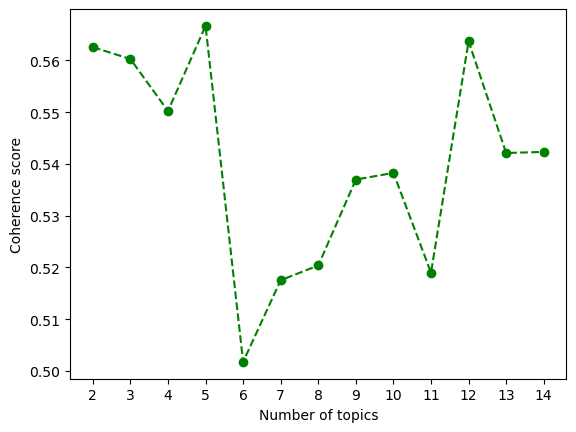

In [174]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

In [175]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=df['cleaned_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.5017293550930038


In [176]:
ldamodel.print_topics()

[(0,
  '0.104*"product" + 0.022*"hai" + 0.019*"waste" + 0.017*"h" + 0.013*"money" + 0.011*"nice" + 0.011*"box" + 0.010*"received" + 0.009*"ho" + 0.008*"handset"'),
 (1,
  '0.154*"good" + 0.105*"phone" + 0.044*"nice" + 0.030*"price" + 0.022*"great" + 0.016*"camera" + 0.015*"features" + 0.013*"worth" + 0.013*"money" + 0.011*"range"'),
 (2,
  '0.058*"k" + 0.045*"note" + 0.043*"lenovo" + 0.012*"screen" + 0.012*"better" + 0.012*"gb" + 0.011*"call" + 0.010*"like" + 0.010*"working" + 0.008*"features"'),
 (3,
  '0.084*"mobile" + 0.075*"phone" + 0.054*"best" + 0.047*"heating" + 0.044*"problem" + 0.038*"awesome" + 0.019*"worst" + 0.019*"buy" + 0.017*"issue" + 0.017*"bad"'),
 (4,
  '0.079*"camera" + 0.069*"battery" + 0.062*"good" + 0.035*"quality" + 0.020*"poor" + 0.016*"backup" + 0.016*"fast" + 0.015*"performance" + 0.015*"charging" + 0.013*"excellent"'),
 (5,
  '0.041*"phone" + 0.013*"buy" + 0.013*"battery" + 0.012*"even" + 0.012*"amazon" + 0.012*"lenovo" + 0.010*"issue" + 0.010*"problem" + 0.0

In [177]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '600px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['product', 'hai', 'waste', 'h', 'money', 'nice', 'box', 'received', 'ho', 'handset']"
1,1,Mixed issues,"['good', 'phone', 'nice', 'price', 'great', 'camera', 'features', 'worth', 'money', 'range']"
2,2,Heating issue,"['k', 'note', 'lenovo', 'screen', 'better', 'gb', 'call', 'like', 'working', 'features']"
3,3,turbo charger,"['mobile', 'phone', 'best', 'heating', 'problem', 'awesome', 'worst', 'buy', 'issue', 'bad']"
4,4,Connectivity,"['camera', 'battery', 'good', 'quality', 'poor', 'backup', 'fast', 'performance', 'charging', 'excellent']"
5,5,Battery,"['phone', 'buy', 'battery', 'even', 'amazon', 'lenovo', 'issue', 'problem', 'time', 'mobile']"


In [178]:
for index,sent in enumerate(ldamodel[term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  df.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [179]:
for index,topic_num in enumerate(df.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  df.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [182]:
df.head()

,sentiment,review,cleaned_review,pos_tagged_review,nouns_only_review,lemmatized_review,Topic_Number,Topic_Name
0,1,Good but need updates and improvements,"[good, need, updates, improvements]","[(good, JJ), (but, CC), (need, VBP), (updates,...","[updates, improvements]","[update, improvement]",2,Heating issue
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin...","[(worst, JJS), (mobile, NN), (i, NN), (have, V...","[mobile, i, battery, hell, backup, hours, inte...","[mobile, i, battery, hell, backup, hour, inter...",5,Battery
2,1,when I will get my 10% cash back.... its alrea...,"[get, cash, back, already, january]","[(when, WRB), (i, NN), (will, MD), (get, VB), ...","[i, cash]","[i, cash]",5,Battery
3,1,Good,[good],"[(good, JJ)]",[],[],1,Mixed issues
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,...","[(the, DT), (worst, JJS), (phone, NN), (everth...","[phone, everthey, phone, problem, amazon, phon...","[phone, everthey, phone, problem, amazon, phon...",5,Battery


## Visualized Reviewed Topic

In [142]:
import seaborn as sns

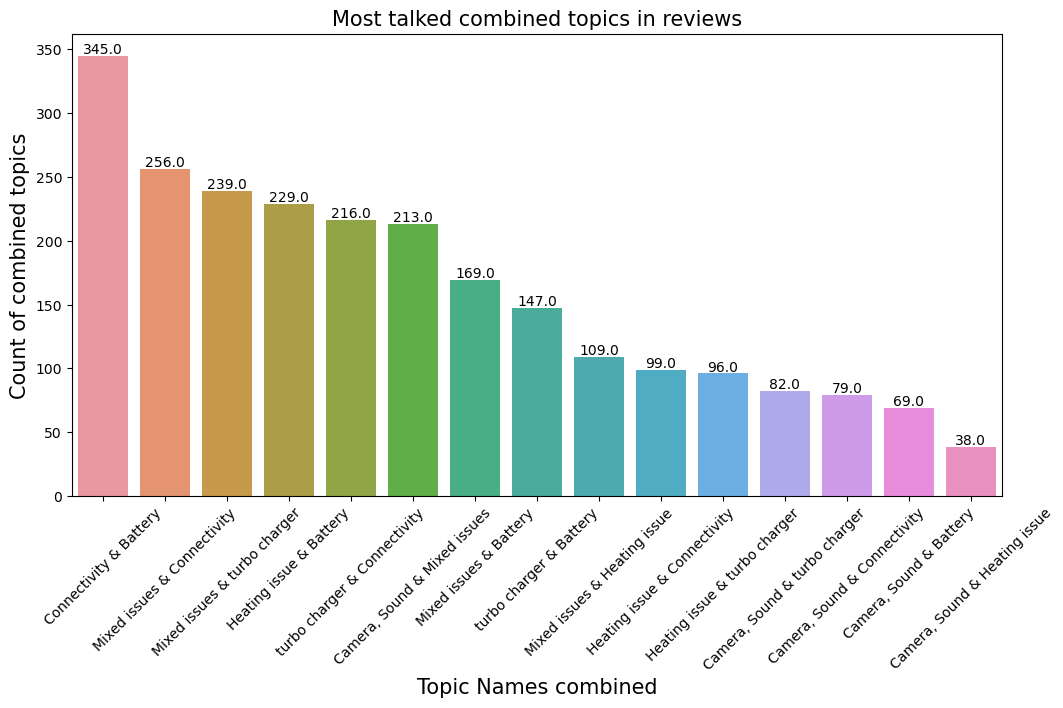

In [186]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df.Topic_Name.value_counts()[6:].index,y=df.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

In [188]:
df.loc[df.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '600px'})

,review,Topic_Name
1,"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",Battery
2,when I will get my 10% cash back.... its already 15 January..,Battery
4,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon,Battery
7,The battery level has worn down,Battery
9,A lot of glitches dont buy this thing better go for some other options,Battery
11,Good phone but charger not working / damage within 2 months.,Battery
16,every time automatic on and off so kindly suggest me what i can do,Battery
18,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Battery
29,"I bouth this Fon , but I am surprised to see that,This Fon has two speekars but only one ringing other is non ringing. I am disappointed .",Mixed issues & Battery
31,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",Battery
